In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [3]:
df_jab = pd.read_csv('data/test/10LEFTHOOK12.5HZ.csv')

In [4]:
df_jab.head(10)

,epoc (ms),timestamp (-0800),elapsed (s),x-axis (g),y-axis (g),z-axis (g)
0,1572895594685,2019-11-04T11.26.34.685,0.000,0.792,0.776,0.000
1,1572895594764,2019-11-04T11.26.34.764,0.079,0.775,0.789,-0.002
2,1572895594843,2019-11-04T11.26.34.843,0.158,0.744,0.760,0.012
3,1572895594922,2019-11-04T11.26.34.922,0.237,0.786,0.763,0.044
4,1572895595001,2019-11-04T11.26.35.001,0.316,0.917,0.708,0.293
5,1572895595080,2019-11-04T11.26.35.080,0.395,0.973,0.552,0.524
6,1572895595159,2019-11-04T11.26.35.159,0.474,0.727,0.299,0.599
7,1572895595238,2019-11-04T11.26.35.238,0.553,0.638,0.715,0.424
8,1572895595317,2019-11-04T11.26.35.317,0.632,0.713,0.997,0.281
9,1572895595395,2019-11-04T11.26.35.395,0.710,0.739,0.883,0.305


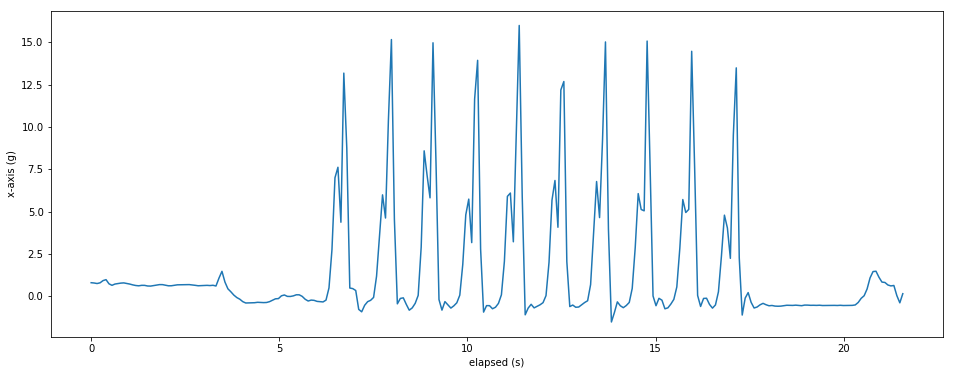

In [5]:
plt.figure(figsize=(16, 6))
sb.lineplot(df_jab["elapsed (s)"],df_jab["x-axis (g)"])

In [6]:
df_jab["magnitude"] = np.sqrt(df_jab["x-axis (g)"]**2+df_jab["y-axis (g)"]**2+df_jab["z-axis (g)"]**2)

In [7]:
df_jab.head(10)

,epoc (ms),timestamp (-0800),elapsed (s),x-axis (g),y-axis (g),z-axis (g),magnitude
0,1572895594685,2019-11-04T11.26.34.685,0.000,0.792,0.776,0.000,1.108801
1,1572895594764,2019-11-04T11.26.34.764,0.079,0.775,0.789,-0.002,1.105961
2,1572895594843,2019-11-04T11.26.34.843,0.158,0.744,0.760,0.012,1.063616
3,1572895594922,2019-11-04T11.26.34.922,0.237,0.786,0.763,0.044,1.096312
4,1572895595001,2019-11-04T11.26.35.001,0.316,0.917,0.708,0.293,1.194990
5,1572895595080,2019-11-04T11.26.35.080,0.395,0.973,0.552,0.524,1.235317
6,1572895595159,2019-11-04T11.26.35.159,0.474,0.727,0.299,0.599,0.988297
7,1572895595238,2019-11-04T11.26.35.238,0.553,0.638,0.715,0.424,1.047876
8,1572895595317,2019-11-04T11.26.35.317,0.632,0.713,0.997,0.281,1.257513
9,1572895595395,2019-11-04T11.26.35.395,0.710,0.739,0.883,0.305,1.191149


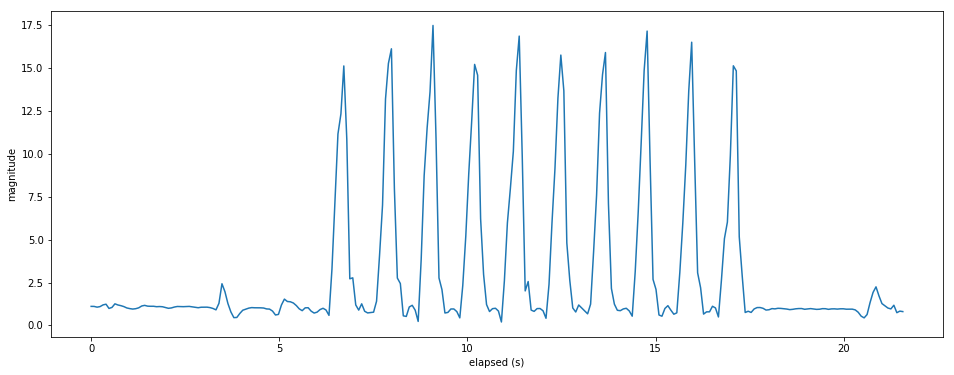

In [8]:
plt.figure(figsize=(16, 6))
sb.lineplot(df_jab["elapsed (s)"],df_jab["magnitude"])

In [9]:
events = sorted(list(df_jab.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(10)))

In [10]:
events

[7.899,
 7.979,
 9.084,
 10.19,
 11.375,
 12.481,
 13.667,
 14.774000000000001,
 15.958,
 17.065]

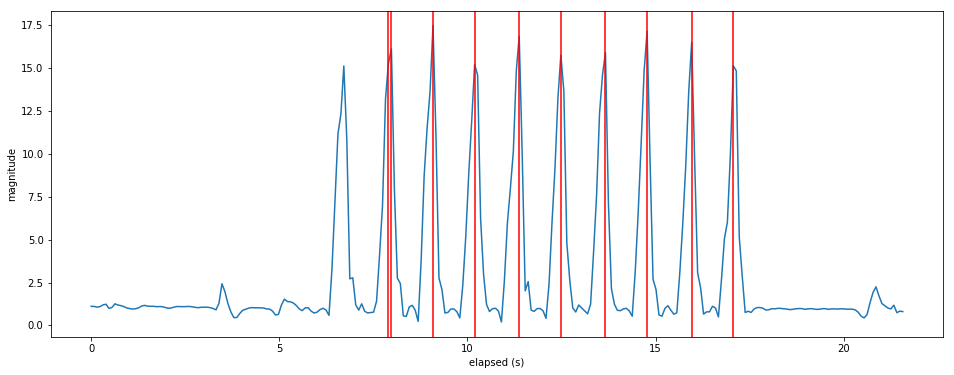

In [11]:
plt.figure(figsize=(16, 6))
sb.lineplot(df_jab["elapsed (s)"],df_jab["magnitude"])
for each in events:
    plt.axvline(each,color="r")

In [13]:
timestamps = df_jab.sort_values(["magnitude"],ascending=False)["elapsed (s)"].head(10).to_dict()

In [14]:
event_index = sorted(timestamps)

In [15]:
punches = []
for each in event_index:
    i = 4
    dummy = df_jab.iloc[each-i:each+i]
    dummy["time"] = list(range(0,len(dummy)))
    punches.append(dummy)
    


/Users/matthewhwang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [16]:
punches[0]

,epoc (ms),timestamp (-0800),elapsed (s),x-axis (g),y-axis (g),z-axis (g),magnitude,time
96,1572895602269,2019-11-04T11.26.42.269,7.584,1.179,-0.712,0.301,1.409818,0
97,1572895602349,2019-11-04T11.26.42.349,7.664,3.636,-1.413,1.266,4.101198,1
98,1572895602428,2019-11-04T11.26.42.428,7.743,5.986,2.623,2.559,7.018604,2
99,1572895602507,2019-11-04T11.26.42.507,7.822,4.617,11.540,4.462,13.205973,3
100,1572895602584,2019-11-04T11.26.42.584,7.899,10.394,10.721,-3.246,15.281086,4
101,1572895602664,2019-11-04T11.26.42.664,7.979,15.167,-0.561,-5.480,16.136388,5
102,1572895602743,2019-11-04T11.26.42.743,8.058,4.544,-5.897,2.845,7.969728,6
103,1572895602822,2019-11-04T11.26.42.822,8.137,-0.456,0.566,2.663,2.760410,7


In [17]:
punches[1]

,epoc (ms),timestamp (-0800),elapsed (s),x-axis (g),y-axis (g),z-axis (g),magnitude,time
97,1572895602349,2019-11-04T11.26.42.349,7.664,3.636,-1.413,1.266,4.101198,0
98,1572895602428,2019-11-04T11.26.42.428,7.743,5.986,2.623,2.559,7.018604,1
99,1572895602507,2019-11-04T11.26.42.507,7.822,4.617,11.540,4.462,13.205973,2
100,1572895602584,2019-11-04T11.26.42.584,7.899,10.394,10.721,-3.246,15.281086,3
101,1572895602664,2019-11-04T11.26.42.664,7.979,15.167,-0.561,-5.480,16.136388,4
102,1572895602743,2019-11-04T11.26.42.743,8.058,4.544,-5.897,2.845,7.969728,5
103,1572895602822,2019-11-04T11.26.42.822,8.137,-0.456,0.566,2.663,2.760410,6
104,1572895602901,2019-11-04T11.26.42.901,8.216,-0.137,2.305,0.795,2.442093,7


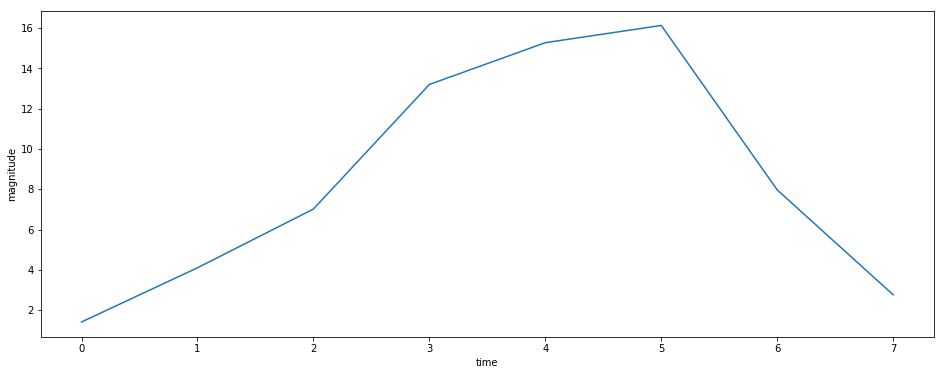

In [18]:
plt.figure(figsize=(16, 6))
sb.lineplot(punches[0]["time"],punches[0]["magnitude"])

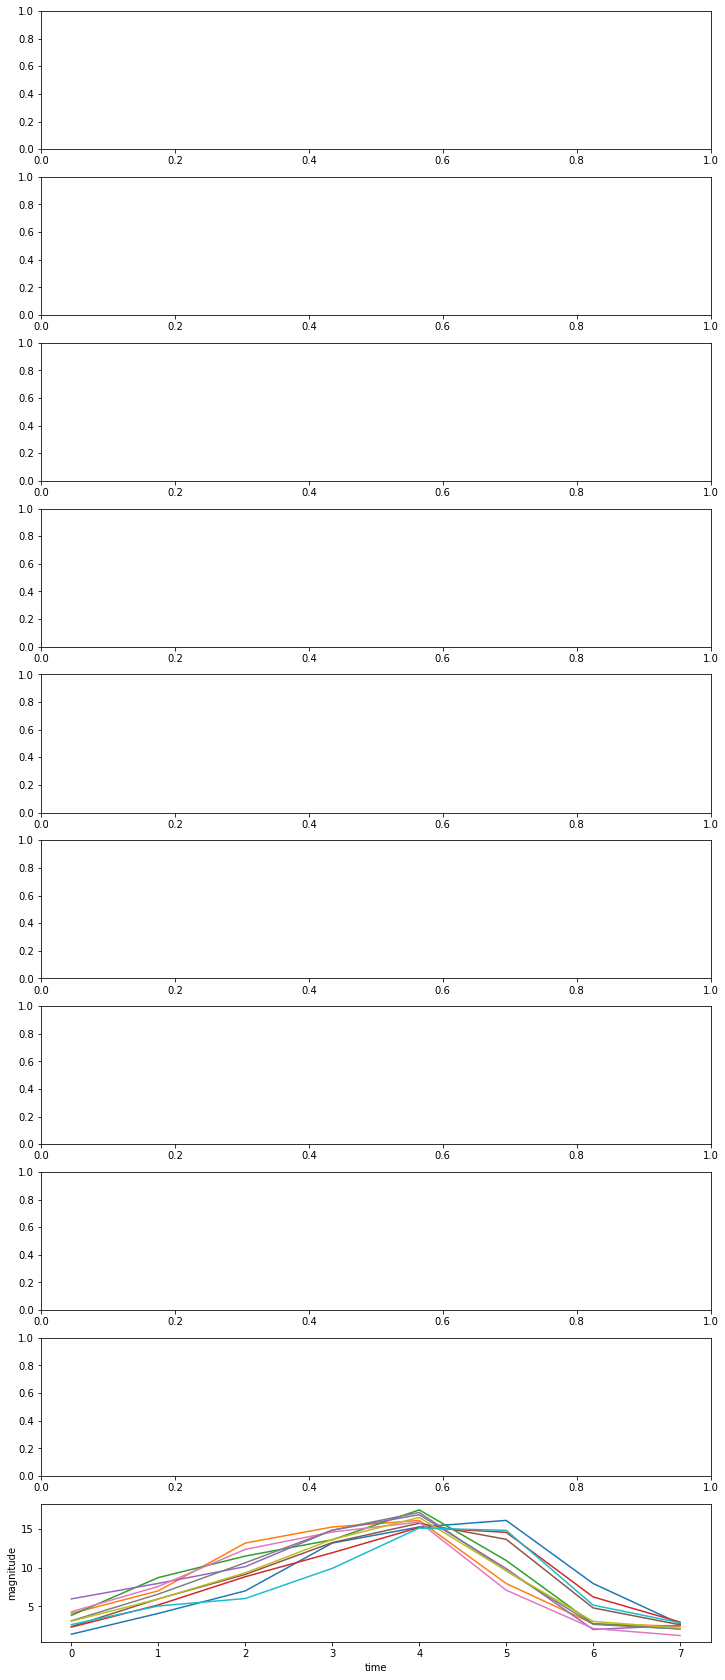

In [19]:
fig, axs = plt.subplots(10,1,figsize=(12,30))

for i,ax in enumerate(axs.flatten()):
    sb.lineplot(punches[i]["time"],punches[i]["magnitude"])